In [1]:
import json 
import pandas as pd
from urllib.request import urlopen
from disCap import finmod as FM
from disCap import disCap
import matplotlib.pyplot as plt
import numpy as np

'''
financialmodelingprep ask that the API key not be shared.  I keep mine in a json
file.  The API key is available and free for use provided by registration at 
the site, it is to not be shared or left in git. 
'''
api_key = None
with open('../../.credentials/credentials.json') as f:
  api_keys = json.load(f)
api_key = api_keys['fiancialmod']

In [7]:
symbols = ['ETHUSD','TMUS','AMD']
dfx = FM.portfolio_data(symbols, api_key)
dfx.head(10)

False
Reading ETHUSD and writing to archive
Symbol: ETHUSD.  Keys: dict_keys(['symbol', 'historical'])
continue...

Pulling data from data/arc/20210318/TMUS.json for today: TMUS
True
Symbol: TMUS.  Keys: dict_keys(['symbol', 'historical'])
continue...

False
Reading AMD and writing to archive
Symbol: AMD.  Keys: dict_keys(['symbol', 'historical'])
continue...



,symbol,close,prev_close,maxmed10,maxmed30,maxmed60,maxmed120,maxmed240
0,ETHUSD,1835.522705,1823.449341,1840.379639,1927.567566,1794.44104,1224.197144,467.388137
1,TMUS,124.910004,127.300003,127.210003,123.009998,130.75000,133.000000,128.039997
2,AMD,78.120003,82.629997,81.865002,87.790001,92.16000,94.580002,85.550003


In [8]:
with open('data/stock_description.json') as f:
  stock_description = json.load(f)

with open('data/investments.json') as f:
  investments = json.load(f)

stock_description_df = FM.stockDescriptionAs_df(stock_description)
investments_df, todays_df = FM.investmentsAs_df(investments)

symbols = stock_description.keys()

dfx = FM.portfolio_data(symbols, api_key)
dfx['rho'] = dfx['close']/dfx['maxmed30']
dfx = dfx.sort_values(by=['rho'], ascending=False)

todays_df = todays_df.merge(dfx, how='left', on='symbol')
todays_df['value'] =  todays_df['close'] * todays_df['shares'] 
todays_df['gain'] =  todays_df['value']/todays_df['invested']

Pulling data from data/arc/20210318/AMD.json for today: AMD
True
Symbol: AMD.  Keys: dict_keys(['symbol', 'historical'])
continue...

False
Reading PYPL and writing to archive
Symbol: PYPL.  Keys: dict_keys(['symbol', 'historical'])
continue...

False
Reading OKTA and writing to archive
Symbol: OKTA.  Keys: dict_keys(['symbol', 'historical'])
continue...

False
Reading AMZN and writing to archive
Symbol: AMZN.  Keys: dict_keys(['symbol', 'historical'])
continue...

False
Reading APPN and writing to archive
Symbol: APPN.  Keys: dict_keys(['symbol', 'historical'])
continue...

False
Reading WORK and writing to archive
Symbol: WORK.  Keys: dict_keys(['symbol', 'historical'])
continue...

False
Reading ALB and writing to archive
Symbol: ALB.  Keys: dict_keys(['symbol', 'historical'])
continue...

False
Reading ADBE and writing to archive
Symbol: ADBE.  Keys: dict_keys(['symbol', 'historical'])
continue...

False
Reading ESTC and writing to archive
Symbol: ESTC.  Keys: dict_keys(['symbol', 

In [9]:
total_invested, total_value = sum(todays_df.invested), sum(todays_df.value)
todays_df = todays_df.merge( stock_description_df, on='symbol',how='left')
todays_df['prc_value'] = 100* ( todays_df['value']/total_value )
todays_df['prc_invested'] = 100 * (todays_df['invested']/total_value )
todays_df['basis'] = todays_df['invested']/todays_df['shares']

Red at gain = 0.83845264307392.
Changes linear to yellow at 1.0.
From 1.0 to 3.172938483696667 is green blue shift


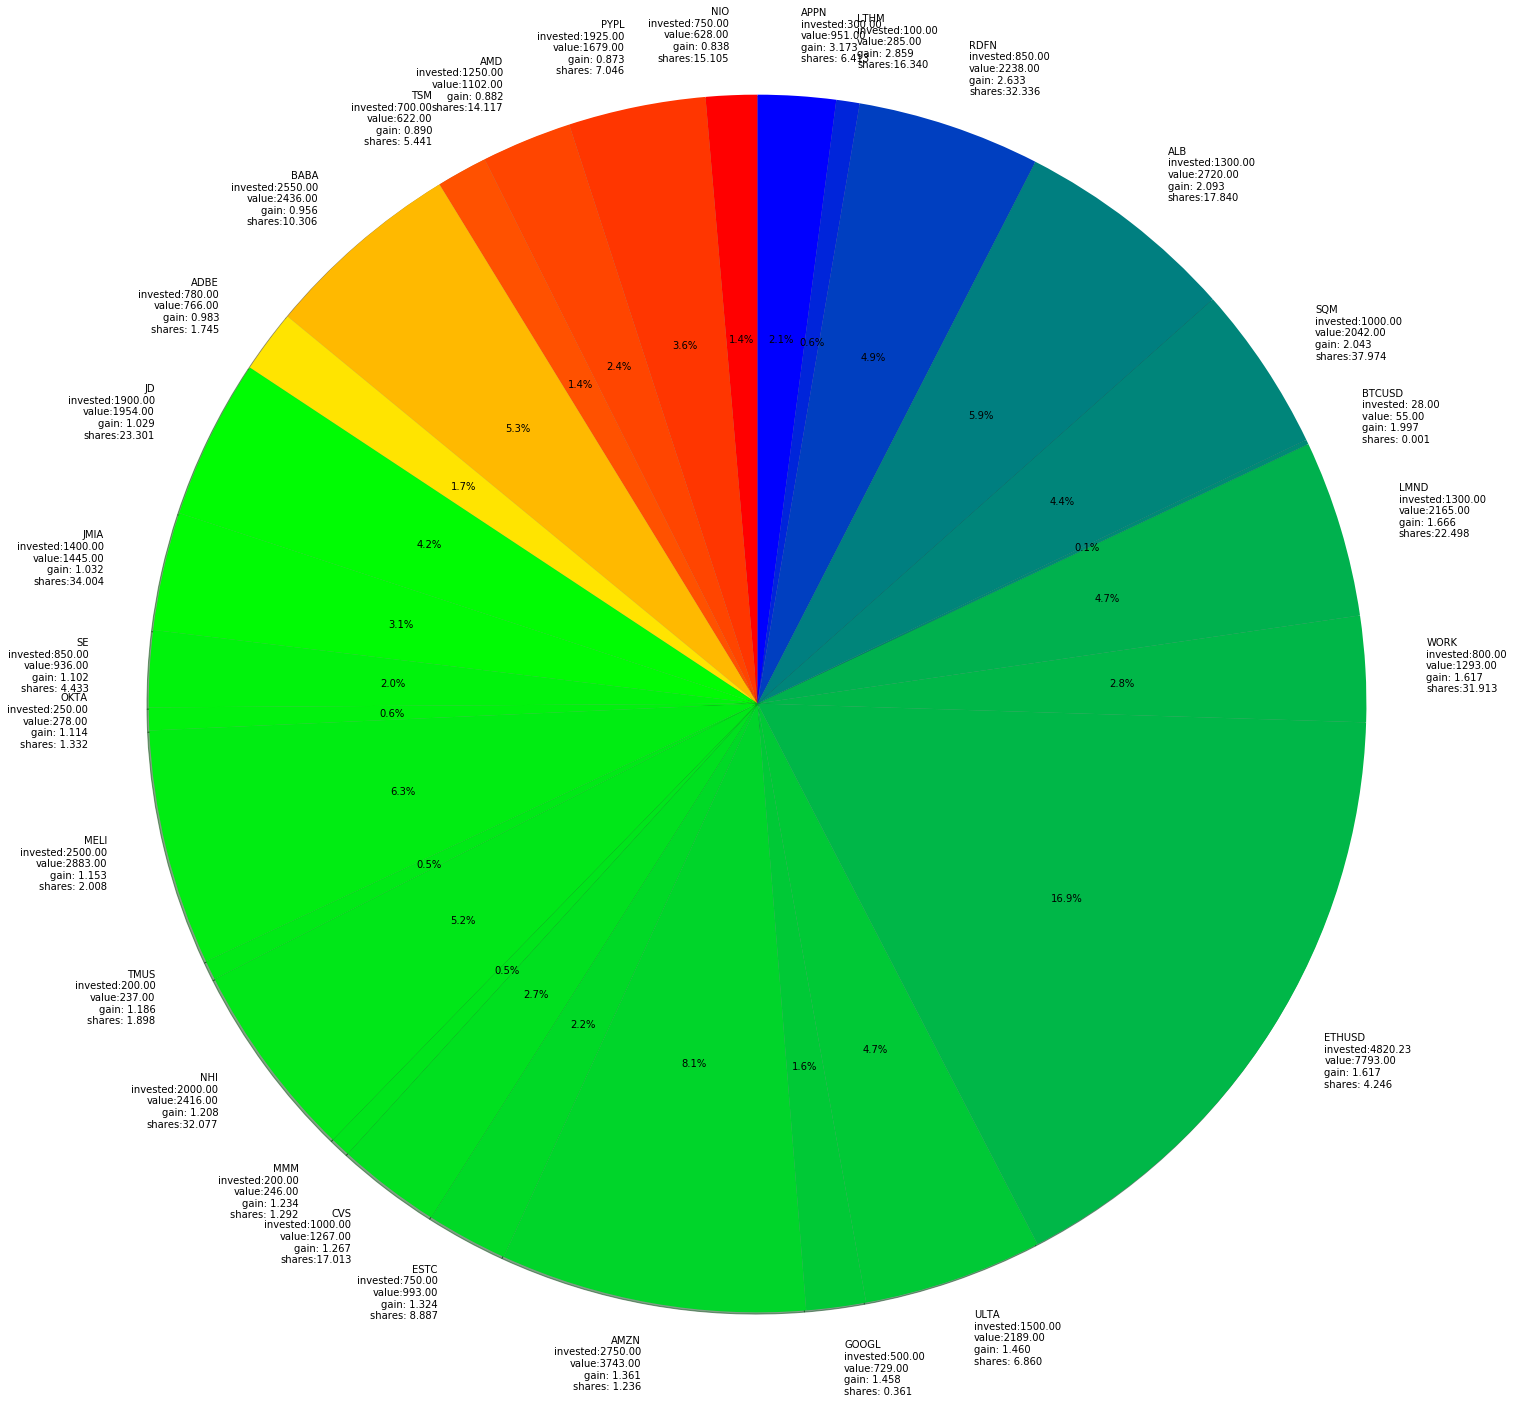



Total Invested:		34253.23
Total Value:		46107.59
Total Gain %:		  1.35


In [10]:
fig1, ax1 = plt.subplots()
todays_df = todays_df.sort_values(by=['gain'])
# rgb_gain(df.gain,0.8,0.95,2)
red_point = min( min(todays_df.gain), 0.95)
blue_point = max( max(todays_df.gain), 3)
green_point = 1.00

red_point = min(todays_df.gain)
blue_point = max(todays_df.gain)
#green_point = np.median( df.gain )

print('Red at gain = {}.\nChanges linear to yellow at {}.\nFrom {} to {} is green blue shift'.\
      format(red_point, green_point, green_point, blue_point))

label_ = list( map( disCap.mklab, todays_df.symbol, \
                   todays_df.invested, todays_df.value, todays_df.gain, todays_df.shares) )
ax1.pie(todays_df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(todays_df.gain,red_point,green_point,blue_point) )

plt.show()



print('\n\nTotal Invested:\t\t{0:6.2f}\nTotal Value:\t\t{1:6.2f}\nTotal Gain %:\t\t{2:6.2f}'.\
      format(total_invested, total_value, total_value/total_invested))

In [11]:
fields = ['symbol','gain','close','basis','shares','invested','value','prc_invested','prc_value','first_investment','last_investment'\
         ,'prev_close','maxmed30','rho']



fields = ['symbol','sector','gain','close','basis','shares','invested','value','first_investment','last_investment'\
         ,'prev_close','maxmed30','rho']
todays_df[fields].head(40)

,symbol,sector,gain,close,basis,shares,invested,value,first_investment,last_investment,prev_close,maxmed30,rho
18,NIO,Electric Vehicle,0.838453,41.630001,49.650987,15.105440,750.00,628.839482,2020.11.09,2021.01.07,44.759998,53.145000,0.783329
20,PYPL,"Tech, Fintech",0.872667,238.410004,273.196900,7.046200,1925.00,1679.884570,2021.02.15,2021.03.05,251.470001,280.385010,0.850295
2,AMD,"Tech, Semiconductors",0.882272,78.120003,88.544157,14.117250,1250.00,1102.839612,2021.02.16,2021.03.09,82.629997,87.790001,0.889851
25,TSM,"Tech, Semiconductors",0.889991,114.500000,128.653058,5.440990,700.00,622.993355,2021.02.18,2021.03.09,118.760002,134.100006,0.853840
5,BABA,"Virtual Marketplace, Cloud Services",0.955510,236.429993,247.438526,10.305590,2550.00,2436.550572,2020.11.27,2020.12.29,233.339996,258.794998,0.913580
0,ADBE,"Tech, Creative",0.982643,439.179993,446.937618,1.745210,780.00,766.461316,2020.06.05,2021.01.05,451.010010,477.869995,0.919037
11,JD,"Virtual Marketplace, Cloud Services",1.028924,83.900002,81.541495,23.301020,1900.00,1954.955625,2020.10.16,2020.12.28,85.370003,102.450001,0.818936
12,JMIA,"Virtual Marketplace, Cloud Services",1.032259,42.500000,41.171857,34.003810,1400.00,1445.161925,2020.12.21,2021.03.09,50.080002,53.254999,0.798047
22,SE,"Virtual Marketplace, Cloud Services",1.101868,211.259995,191.729035,4.433340,850.00,936.587386,2020.12.22,2020.12.28,224.350006,260.230004,0.811820
19,OKTA,"Tech, Security",1.113698,209.039993,187.698961,1.331920,250.00,278.424547,2020.05.20,2020.05.20,224.889999,279.279999,0.748496


In [12]:
todays_df = todays_df.sort_values(by=['rho'])
todays_df[fields].head(40)

,symbol,sector,gain,close,basis,shares,invested,value,first_investment,last_investment,prev_close,maxmed30,rho
13,LMND,"Tech, Insurance",1.665745,96.250000,57.781964,22.498370,1300.00,2165.468113,2020.07.29,2020.10.01,104.769997,141.214996,0.681585
8,ESTC,"Tech, DB",1.324013,111.739998,84.394928,8.886790,750.00,993.009897,2020.04.21,2020.09.22,116.290001,157.720001,0.708471
19,OKTA,"Tech, Security",1.113698,209.039993,187.698961,1.331920,250.00,278.424547,2020.05.20,2020.05.20,224.889999,279.279999,0.748496
4,APPN,"Tech, Business Processes",3.172938,148.429993,46.779978,6.413000,300.00,951.881545,2020.02.22,2020.02.22,167.160004,196.180001,0.756601
21,RDFN,"Tech, Real Estate",2.633311,69.220001,26.286297,32.336240,850.00,2238.314565,2020.03.05,2020.03.10,73.150002,91.209999,0.758908
15,MELI,"Virtual Marketplace, Cloud Services",1.153451,1436.170044,1245.106731,2.007860,2500.00,2883.628385,2020.08.20,2021.03.09,1537.619995,1839.534973,0.780725
18,NIO,Electric Vehicle,0.838453,41.630001,49.650987,15.105440,750.00,628.839482,2020.11.09,2021.01.07,44.759998,53.145000,0.783329
12,JMIA,"Virtual Marketplace, Cloud Services",1.032259,42.500000,41.171857,34.003810,1400.00,1445.161925,2020.12.21,2021.03.09,50.080002,53.254999,0.798047
22,SE,"Virtual Marketplace, Cloud Services",1.101868,211.259995,191.729035,4.433340,850.00,936.587386,2020.12.22,2020.12.28,224.350006,260.230004,0.811820
11,JD,"Virtual Marketplace, Cloud Services",1.028924,83.900002,81.541495,23.301020,1900.00,1954.955625,2020.10.16,2020.12.28,85.370003,102.450001,0.818936


In [13]:
todays_df = todays_df.sort_values(by=['prc_value'])
todays_df[fields].head(40)

,symbol,sector,gain,close,basis,shares,invested,value,first_investment,last_investment,prev_close,maxmed30,rho
6,BTCUSD,cryptocurrency,1.996993,58790.054688,29439.286728,0.000951,28.00,55.915809,2021.01.02,2021.01.29,58870.894531,55047.726563,1.067983
24,TMUS,Cellular,1.185521,124.910004,105.362975,1.898200,200.00,237.104170,2020.07.07,2020.07.22,127.300003,123.009998,1.015446
16,MMM,Industrial,1.233698,191.000000,154.819133,1.291830,200.00,246.739530,2020.07.07,2020.07.07,188.300003,177.845002,1.073969
19,OKTA,"Tech, Security",1.113698,209.039993,187.698961,1.331920,250.00,278.424547,2020.05.20,2020.05.20,224.889999,279.279999,0.748496
14,LTHM,"Li Mining, Specialty Chemicals, Battery",2.859477,17.500000,6.120000,16.339870,100.00,285.947725,2020.03.11,2020.03.11,18.920000,20.355001,0.859740
25,TSM,"Tech, Semiconductors",0.889991,114.500000,128.653058,5.440990,700.00,622.993355,2021.02.18,2021.03.09,118.760002,134.100006,0.853840
18,NIO,Electric Vehicle,0.838453,41.630001,49.650987,15.105440,750.00,628.839482,2020.11.09,2021.01.07,44.759998,53.145000,0.783329
10,GOOGL,"Tech, ecclectic",1.458073,2021.339966,1386.308814,0.360670,500.00,729.036686,2020.02.28,2020.02.28,2082.219971,2086.310059,0.968859
0,ADBE,"Tech, Creative",0.982643,439.179993,446.937618,1.745210,780.00,766.461316,2020.06.05,2021.01.05,451.010010,477.869995,0.919037
22,SE,"Virtual Marketplace, Cloud Services",1.101868,211.259995,191.729035,4.433340,850.00,936.587386,2020.12.22,2020.12.28,224.350006,260.230004,0.811820


In [15]:
dfx = todays_df

sector_df = dfx[['sector','invested','value']].groupby('sector').agg('sum').reset_index()
total = sum( sector_df['value'] )
sector_df['gain'] = sector_df['value']/sector_df['invested']
sector_df['percentage_value'] = 100.00*sector_df['value']/total

area_df = dfx[['area','invested','value']].groupby('area').agg('sum').reset_index()
total = sum( area_df['value'] )
area_df['gain'] = area_df['value']/area_df['invested']
area_df['percentage_value'] = 100*area_df['value']/total

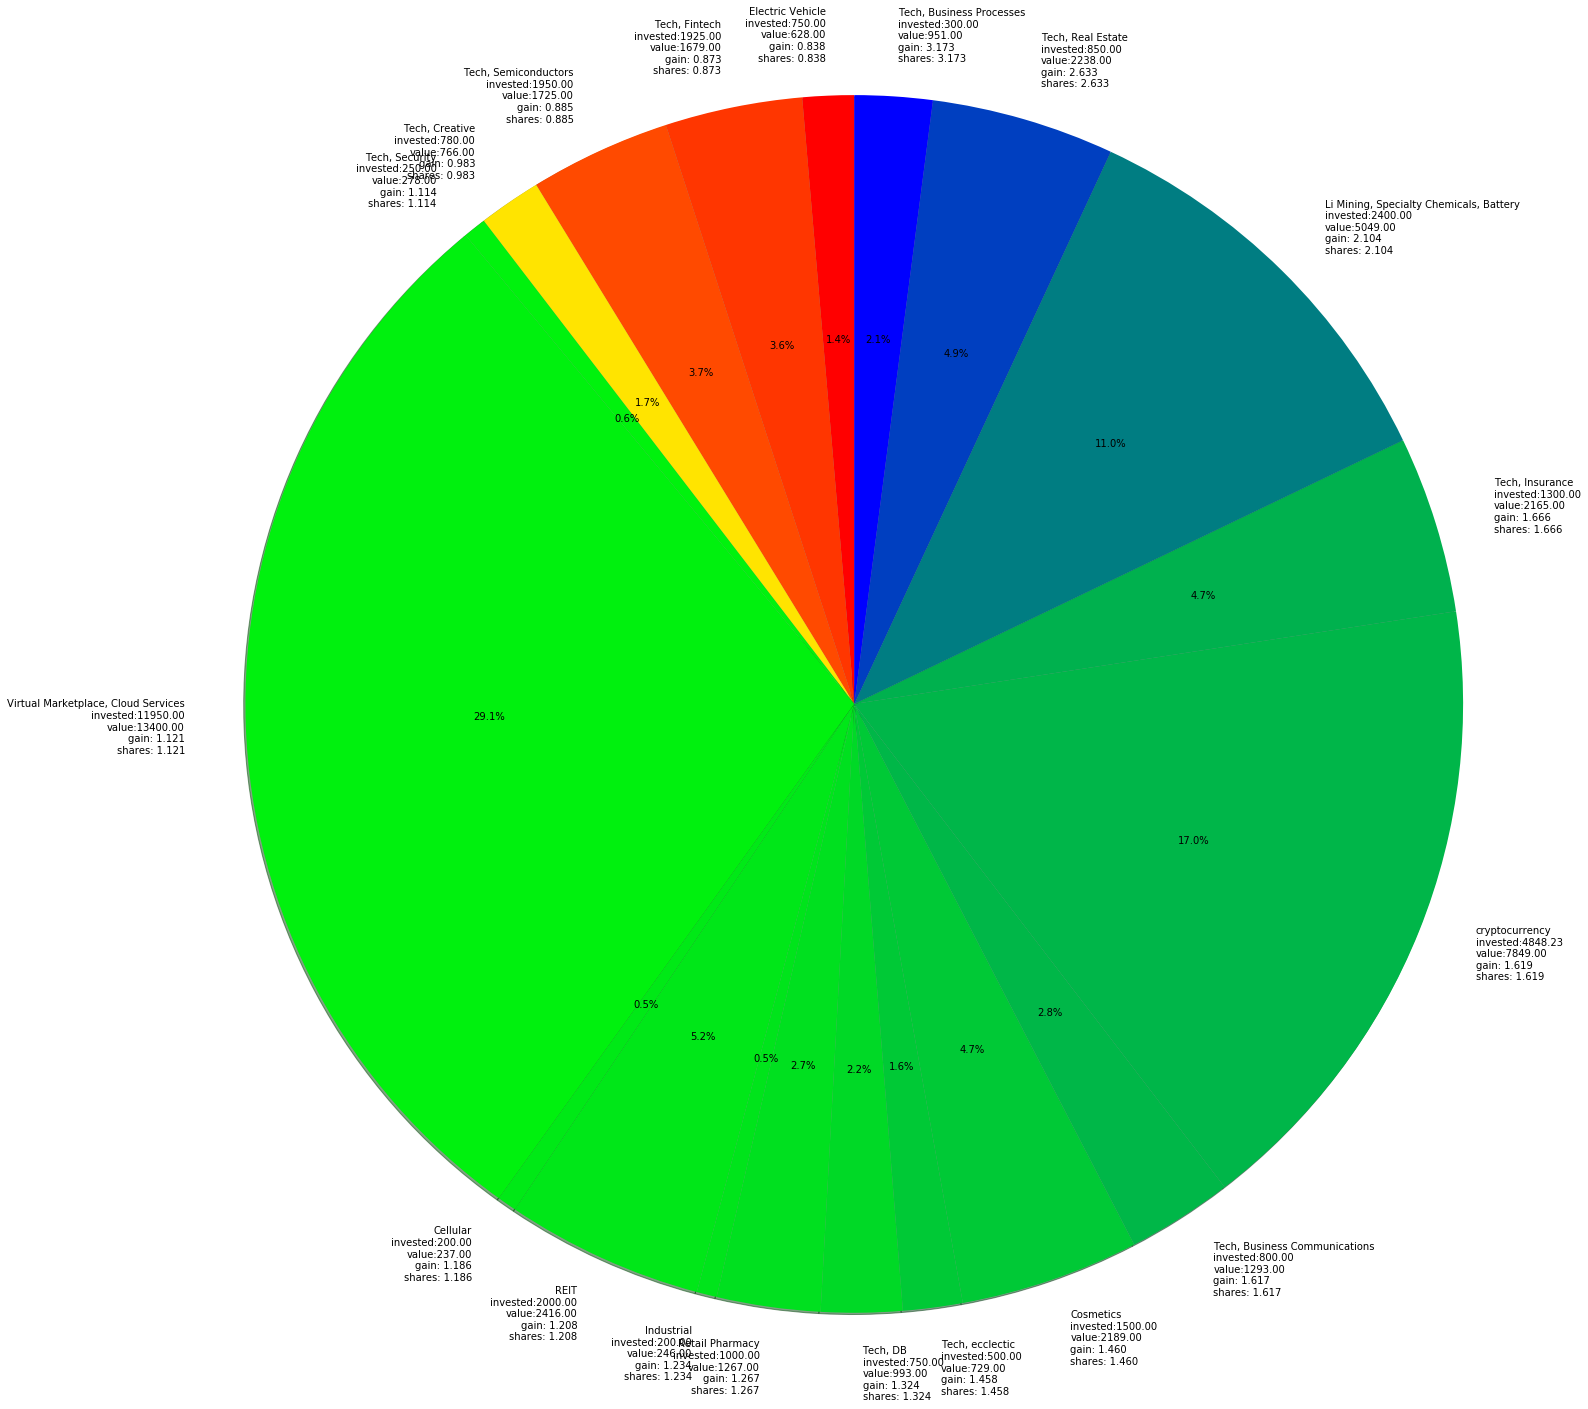

In [16]:
fig1, ax1 = plt.subplots()
df = sector_df
df = df.sort_values(by=['gain'])

label_ = list( map( disCap.mklab, df.sector, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [17]:
df.sort_values(by=['percentage_value']).head(20)

,sector,invested,value,gain,percentage_value
0,Cellular,200.00,237.104170,1.185521,0.514241
3,Industrial,200.00,246.739530,1.233698,0.535139
14,"Tech, Security",250.00,278.424547,1.113698,0.603858
2,Electric Vehicle,750.00,628.839482,0.838453,1.363852
16,"Tech, ecclectic",500.00,729.036686,1.458073,1.581164
9,"Tech, Creative",780.00,766.461316,0.982643,1.662332
8,"Tech, Business Processes",300.00,951.881545,3.172938,2.064479
10,"Tech, DB",750.00,993.009897,1.324013,2.153680
6,Retail Pharmacy,1000.00,1267.097754,1.267098,2.748132
7,"Tech, Business Communications",800.00,1293.454123,1.616818,2.805295


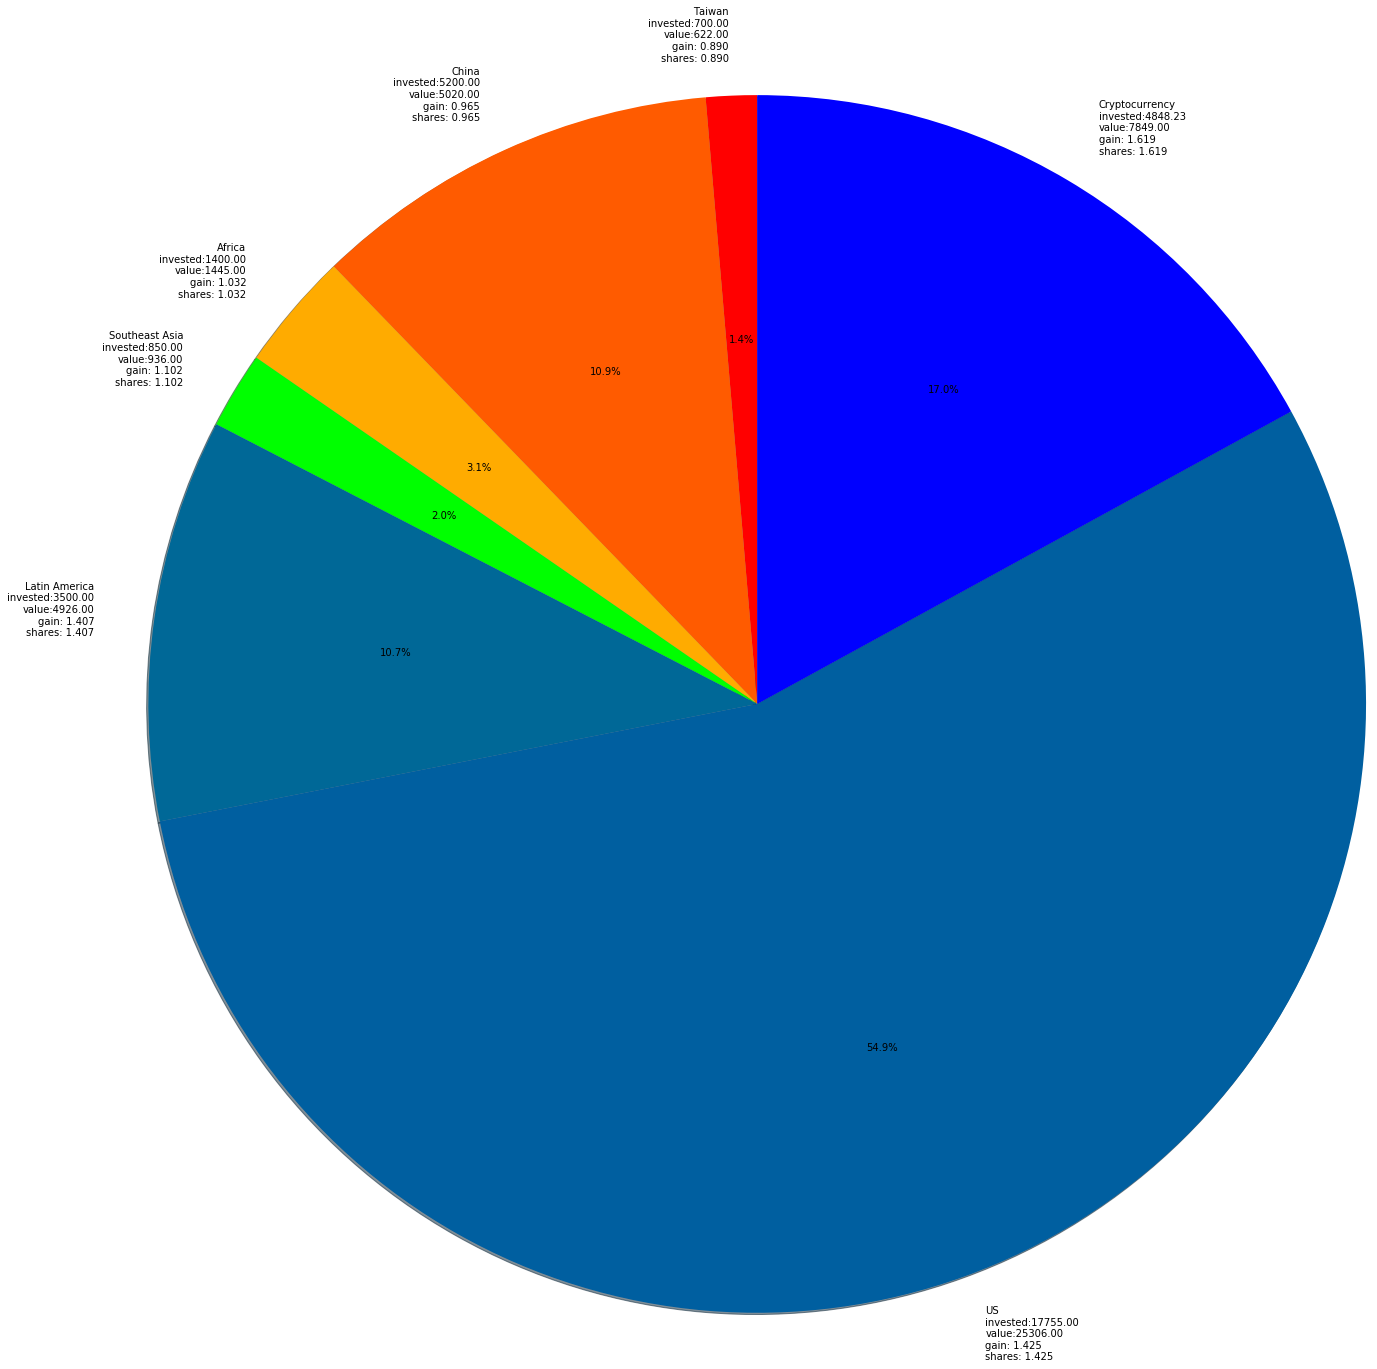

In [18]:
fig1, ax1 = plt.subplots()
df = area_df
df = df.sort_values(by=['gain'])

red_point = min(df.gain)
blue_point = max(df.gain)
green_point = np.median( df.gain )

label_ = list( map( disCap.mklab, df.area, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()